# Основы глубинного обучения, майнор ИАД

## Домашнее задание 1. Введение в PyTorch. Полносвязные нейронные сети.

### Общая информация

Дата выдачи: 06.10.2021

Мягкий дедлайн: 23:59MSK 25.10.2021

Жесткий дедлайн: 23:59MSK 28.10.2021

### Оценивание и штрафы
Максимально допустимая оценка за работу — 10 баллов. За каждый день просрочки снимается 1 балл. Сдавать задание после жёсткого дедлайна сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этом задании вам предстоит предсказывать год выпуска песни по некоторым звуковым признакам: [данные](https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd). В ячейках ниже находится код для загрузки данных. Обратите внимание, что обучающая и тестовая выборки располагаются в одном файле, поэтому НЕ меняйте ячейку, в которой производится деление данных.

In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import random
from tqdm.auto import tqdm

In [2]:
!wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

--2021-10-26 21:08:02--  https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211011981 (201M) [application/x-httpd-php]
Saving to: ‘data.txt.zip’

data.txt.zip        100%[===================>] 201.24M  44.0MB/s    in 5.0s    

2021-10-26 21:08:07 (40.3 MB/s) - ‘data.txt.zip’ saved [211011981/211011981]



In [3]:
df = pd.read_csv('data.txt.zip', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.08960,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.72670,1.36790,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,...,-25.38187,-3.90772,13.29258,41.55060,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.59110,-8.30657,7.93706,-10.73660,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.12450,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,2.21920,0.34006,44.38997,2056.93836,605.40696,457.41175,777.15347,415.64880,746.47775,366.45320,317.82946,273.07917,141.75921,317.35269,19.48271,-65.25496,162.75145,135.00765,-96.28436,-86.87955,17.38087,45.90742,32.49908,-32.85429,45.10830,26.84939,-302.57328,-41.71932,-138.85034,...,28.55107,1.52298,70.99515,-43.63073,-42.55014,129.82848,79.95420,-87.14554,-45.75446,-65.82100,-43.90031,-19.45705,12.59163,-407.64130,42.91189,12.15850,-88.37882,42.25246,46.49209,-30.17747,45.98495,130.47892,13.88281,-4.00055,17.85965,-18.32138,-87.99109,14.37524,-22.70119,-58.81266,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,2.73553,0.82804,7.46586,699.54544,1016.00954,594.06748,355.73663,507.39931,387.69910,287.15347,112.37152,161.68928,144.14353,199.29693,-4.24359,-297.00587,-148.36392,-7.94726,-18.71630,12.77542,-25.37725,9.71410,0.13843,26.79723,6.30760,28.70107,-74.89005,-289.19553,-166.26089,...,18.50939,16.97216,24.26629,-10.50788,-8.68412,54.75759,194.74034,7.95966,-18.22685,0.06463,-2.63069,26.02561,1.75729,-262.36917,-233.60089,-2.50502,-12.14279,81.37617,2.07554,-1.82381,183.65292,22.64797,-39.98887,43.37381,-31.56737,-4.88840,-36.53213,-23.94662,-84.19275,66.00518,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,6.63016,-3.35142,37.64085,2174.08189,697.43346,459.24587,742.78961,229.30783,387.89697,249.06662,245.89870,176.20527,98.82222,150.97286,78.49057,-62.00282,43.49659,-96.42719,-108.96608,14.22854,14.54178,-23.55608,-39.36953,-43.59209,20.83714,35.63919,-181.34947,-93.66614,-90.55616,...,4.56917,-37.32280,4.15159,12.24315,35.02697,-178.89573,82.46573,-20.49425,101.78577,-19.77808,-21.52657,3.36303,-11.63176,51.55411,-50.57576,-28.14755,-83.15795,-7.35260,-22.11505,1.18279,-122.70467,150.57360,24.37468,41.19821,-37.04318,-28.72986,162.19614,22.18309,-8.63509,85.23416,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,1.60923,2.19223,47.32082,894.28471,809.86615,318.78559,435.04497,341.61467,334.30734,322.99589,190.61921,235.84715,96.89517,210.58870,5.60463,-199.63958,204.85812,-77.17695,-65.79741,-6.95097,-12.15262,-3.85410,20.68990,-20.30480,37.15045,11.20673,-124.09519,-295.98542,-33.31169,...,45.25506,10.42226,27.88782,-17.12676,-31.54772,-76.86293,41.17343,-138.32535,-53.96905,-21.30266,-24.87362,-2.46595,-4.05003,-56.51161,-34.56445,-5.07092,-47.75605,64.81513,-97.42948,-12.59418,55.23699,28.85657,54.53513,-31.97077,20.03279,-8.07892,-55.12617,26.58961,-10.27183,-30.64232,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.6

In [4]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = 463715
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

## Задание 0. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Мы будем использовать RMSE как метрику качества. Для самого первого бейзлайна обучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

In [5]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

lr = Ridge(alpha=1)
lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)
mean_squared_error(y_test, y_lr_pred) ** 0.5

9.510160711373395

In [6]:
y_const = np.array([np.mean(y_test)] * y_test.shape[0])
mean_squared_error(y_test, y_const) ** 0.5

10.851909820717683

## Задание 1. (максимум 10 баллов)

Реализуйте обучение и тестирование нейронной сети для предоставленного вам набора данных. Соотношение между полученным значением метрики на тестовой выборке и баллами за задание следующее:

- $\text{RMSE} \le 9.00 $ &mdash; 4 балла
- $\text{RMSE} \le 8.90 $ &mdash; 6 баллов
- $\text{RMSE} \le 8.80 $ &mdash; 8 баллов
- $\text{RMSE} \le 8.75 $ &mdash; 10 баллов

Есть несколько правил, которых вам нужно придерживаться:

- Весь пайплайн обучения должен быть написан на PyTorch. При этом вы можете пользоваться другими библиотеками (`numpy`, `sklearn` и пр.), но только для обработки данных. То есть как угодно трансформировать данные и считать метрики с помощью этих библиотек можно, а импортировать модели из `sklearn` и выбивать с их помощью требуемое качество &mdash; нельзя. Также нельзя пользоваться библиотеками, для которых сам PyTorch является зависимостью.

- Мы никак не ограничиваем ваш выбор архитектуры модели, но скорее всего вам будет достаточно полносвязной нейронной сети.

- Для обучения запрещается использовать какие-либо иные данные, кроме обучающей выборки.

- Ансамблирование моделей запрещено.

### Полезные советы:

- Очень вряд ли, что у вас с первого раза получится выбить качество на 10 баллов, поэтому пробуйте разные архитектуры, оптимизаторы и значения гиперпараметров. В идеале при запуске каждого нового эксперимента вы должны менять что-то одно, чтобы точно знать, как этот фактор влияет на качество.

- Тот факт, что мы занимаемся глубинным обучением, не означает, что стоит забывать про приемы, использующиеся в классическом машинном обучении. Так что обязательно проводите исследовательский анализ данных, отрисовывайте нужные графики и не забывайте про масштабирование и подбор гиперпараметров.

- Вы наверняка столкнетесь с тем, что ваша нейронная сеть будет сильно переобучаться. Для нейросетей существуют специальные методы регуляризации, например, dropout ([статья](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)) и weight decay ([блогпост](https://towardsdatascience.com/weight-decay-l2-regularization-90a9e17713cd)). Они, разумеется, реализованы в PyTorch. Попробуйте поэкспериментировать с ними.

- Если вы чего-то не знаете, не гнушайтесь гуглить. В интернете очень много полезной информации, туториалов и советов по глубинному обучению в целом и по PyTorch в частности. Но не забывайте, что за скатанный код без ссылки на источник придется ответить по всей строгости!

- Если вы сразу реализуете обучение на GPU, то у вас будет больше времени на эксперименты, так как любые вычисления будут работать быстрее. Google Colab предоставляет несколько GPU-часов (обычно около 8-10) в сутки бесплатно.

- Чтобы отладить код, можете обучаться на небольшой части данных или даже на одном батче. Если лосс на обучающей выборке не падает, то что-то точно идет не так!

- Пользуйтесь утилитами, которые вам предоставляет PyTorch (например, Dataset и Dataloader). Их специально разработали для упрощения разработки пайплайна обучения.

- Скорее всего вы захотите отслеживать прогресс обучения. Для создания прогресс-баров есть удобная библиотека `tqdm`.

- Быть может, вы захотите, чтобы графики рисовались прямо во время обучения. Можете воспользоваться функцией [clear_output](http://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.clear_output), чтобы удалять старый график и рисовать новый на его месте.

**ОБЯЗАТЕЛЬНО** рисуйте графики зависимости лосса/метрики на обучающей и тестовой выборках в зависимости от времени обучения. Если обучение занимает относительно небольшое число эпох, то лучше рисовать зависимость от номера шага обучения, если же эпох больше, то рисуйте зависимость по эпохам. Если проверяющий не увидит такого графика для вашей лучшей модели, то он в праве снизить баллы за задание.

**ВАЖНО!** Ваше решение должно быть воспроизводимым. Если это не так, то проверяющий имеет право снизить баллы за задание. Чтобы зафиксировать random seed, воспользуйтесь функцией из ячейки ниже.



In [7]:
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

Вы можете придерживаться любой адекватной струкуры кода, но мы советуем воспользоваться следующими сигнатурами функций. Лучше всего, если вы проверите ваши предсказания ассертом: так вы убережете себя от разных косяков, например, что вектор предсказаний состоит из всего одного числа. В любом случае, внимательно следите за тем, для каких тензоров вы считаете метрику RMSE. При случайном или намеренном введении в заблуждение проверяющие очень сильно разозлятся.

### **Отнормируем и разобьем данные**

In [8]:
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
scaler_X = StandardScaler().fit(X_train)
scaler_y = StandardScaler().fit(y_train.reshape(-1, 1))
X = scaler_X.transform(X)
y = scaler_y.transform(y.reshape(-1, 1))

train_size = 463715
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

### **Формируем батчи с помощью DataLoader**

In [9]:
class my_dataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self, idx):
        # [X_batch, y_batch]
        return [torch.tensor(self.X[idx, :], dtype=torch.float), torch.tensor(self.y[idx], dtype=torch.float)]

In [10]:
train_set = my_dataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(
    train_set, 
    batch_size=90,
    shuffle=True
    ) 

test_set = my_dataset(X_test, y_test)
test_loader = torch.utils.data.DataLoader(
    test_set, 
    batch_size=90
    )

In [11]:
next(iter(train_loader))[0].size()

torch.Size([90, 90])

### **Функция отрисовки графика и device**

In [12]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

def plot_history(train_history, val_history, title="Loss"):
    plt.figure()
    plt.title(title)
    plt.plot(train_history, label="Train", c="darkcyan", zorder=1)
    
    points = np.array(val_history)
    steps = list(range(0, len(train_history) + 1, int(len(train_history) / len(val_history))))[1:]
    
    plt.scatter(steps, val_history, marker='+', s=180, c="red", label="Test", zorder=2)
    plt.xlabel("train steps")
    
    plt.legend(loc="best")
    plt.grid()
    
    plt.show()

In [13]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cpu'

### **Функции train и test**

In [14]:
def train(model, optimizer, criterion, train_loader, test_loader, NUM_EPOCH=5):
    '''
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        test_loader - torch.utils.data.Dataloader with test set (if you wish to validate during training)
        NUM_EPOCH - number of epochs
    '''
    train_loss_history = [] # Список train ошибок на каждой эпохе
    test_loss_history = []  # Список test ошибок на каждой эпохе
    
    for epoch in range(NUM_EPOCH):
        # Training
        train_loss_epoch = []  # Список loss-ов на каждом батче
        model.train()

        for X_batch, y_batch in tqdm(train_loader, desc=f"Training. Epoch #{epoch + 1}", leave=False):
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            
            y_pred = model(X_batch)                               # Предиктим на трейне
            loss_batch = torch.sqrt(criterion(y_pred, y_batch))   # Считаем Loss
            loss_batch.backward()                                 # Считаем градиенты бэкпропом
            optimizer.step()                                      # Обновляем веса, согласно градиентам
            optimizer.zero_grad()                                 # Обнуляем градиенты для следующего шага
            
            train_loss_epoch.append(loss_batch.item())   # Добавляем RMSE_i на i-ом батче в список
        RMSE_epoch = np.mean(train_loss_epoch)           # mean(sum(RMSE_i)) на всем датасете
        train_loss_history.append(RMSE_epoch)            # Добавляем в историю

        # Validation
        test_loss_epoch = []  # Список loss-ов на каждом батче
        model.eval()

        with torch.no_grad():
            for X_batch, y_batch in tqdm(test_loader, desc=f"Validating. Epoch {epoch + 1}", leave=False):
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)

                y_pred = model(X_batch)                              # Предиктим на тесте
                loss_batch = torch.sqrt(criterion(y_pred, y_batch))  # Считаем Loss

                test_loss_epoch.append(loss_batch.item())  # Добавляем RMSE_i на i-ом батче в список
        RMSE_epoch = np.mean(test_loss_epoch)              # mean(sum(RMSE_i)) на всем датасете
        test_loss_history.append(RMSE_epoch)               # Добавляем в историю
        
        # Выводим ошибку на каждой эпохе и рисуем график
        if epoch == 0: print(f"Epoch: \t Train RMSE: \t\t Test RMSE:")
        print(f"{epoch + 1}. \t {train_loss_history[-1]}, \t {test_loss_history[-1]}")
    plot_history(train_loss_epoch, test_loss_history, "RMSE Loss")

def test(model, criterion, test_loader):
    '''
    params:
        model - torch.nn.Module to be evaluated on test set
        criterion - loss function from torch.nn
        test_loader - torch.utils.data.Dataloader with test set
    ----------
    returns:
        predicts - torch.tensor with shape (len(test_loader.dataset), ),
                   which contains predictions for test objects
    '''
    prediction = torch.Tensor([]).to(device)  # Будущий вектор предсказаний
    for X_batch, y_batch in tqdm(test_loader):
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        y_batch_pred = model(X_batch)                              # Предикт на батче
        prediction = torch.cat((prediction, y_batch_pred), dim=0)  # Добавляем в предсказание
    return prediction

### **Архитектура модели**

In [18]:
class ModelBaseline(nn.Module):
    def __init__(self, activation=nn.ReLU):
        super(ModelBaseline, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(90, 250),
            nn.BatchNorm1d(250),
            activation(),
            nn.Dropout(0.2),

            nn.Linear(250, 100),
            nn.BatchNorm1d(100),
            activation(),
            nn.Dropout(0.2),

            nn.Linear(100, 50),
            nn.BatchNorm1d(50),
            activation(),
            nn.Dropout(0.2),

            nn.Linear(50, 1),
        )

    def forward(self, x):
        return self.net(x)

model = ModelBaseline(activation=nn.SELU).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=8e-5)

### **Обучение модели**

### Модель №1. RMSE = 8.778070390508393

Training. Epoch #1:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 1:   0%|          | 0/574 [00:00<?, ?it/s]

Epoch: 	 Train RMSE: 		 Test RMSE:
1. 	 0.8682846506313284, 	 0.7622097898858765


Training. Epoch #2:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 2:   0%|          | 0/574 [00:00<?, ?it/s]

2. 	 0.8350046883040254, 	 0.7581059824195058


Training. Epoch #3:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 3:   0%|          | 0/574 [00:00<?, ?it/s]

3. 	 0.8275452438266954, 	 0.7498425895328721


Training. Epoch #4:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 4:   0%|          | 0/574 [00:00<?, ?it/s]

4. 	 0.8226050732784912, 	 0.7456300593523199


Training. Epoch #5:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 5:   0%|          | 0/574 [00:00<?, ?it/s]

5. 	 0.8190425290266519, 	 0.7419009652079606


Training. Epoch #6:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 6:   0%|          | 0/574 [00:00<?, ?it/s]

6. 	 0.8158854336593305, 	 0.7423212326777522


Training. Epoch #7:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 7:   0%|          | 0/574 [00:00<?, ?it/s]

7. 	 0.8134251175841937, 	 0.7351966857494793


Training. Epoch #8:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 8:   0%|          | 0/574 [00:00<?, ?it/s]

8. 	 0.8120919589380512, 	 0.7360211360018428


Training. Epoch #9:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 9:   0%|          | 0/574 [00:00<?, ?it/s]

9. 	 0.8101784582626651, 	 0.7378791916972669


Training. Epoch #10:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 10:   0%|          | 0/574 [00:00<?, ?it/s]

10. 	 0.8085463138175385, 	 0.73758804647557


Training. Epoch #11:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 11:   0%|          | 0/574 [00:00<?, ?it/s]

11. 	 0.8069543708835137, 	 0.7350868357390892


Training. Epoch #12:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 12:   0%|          | 0/574 [00:00<?, ?it/s]

12. 	 0.8053426699061869, 	 0.7356100724653084


Training. Epoch #13:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 13:   0%|          | 0/574 [00:00<?, ?it/s]

13. 	 0.8043992489998535, 	 0.733448477572265


Training. Epoch #14:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 14:   0%|          | 0/574 [00:00<?, ?it/s]

14. 	 0.80332861515982, 	 0.7306186351730433


Training. Epoch #15:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 15:   0%|          | 0/574 [00:00<?, ?it/s]

15. 	 0.802730086912536, 	 0.7314573780792516


Training. Epoch #16:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 16:   0%|          | 0/574 [00:00<?, ?it/s]

16. 	 0.8013478491390975, 	 0.7320477418887075


Training. Epoch #17:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 17:   0%|          | 0/574 [00:00<?, ?it/s]

17. 	 0.8008896390685706, 	 0.7319778568964802


Training. Epoch #18:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 18:   0%|          | 0/574 [00:00<?, ?it/s]

18. 	 0.7999579586000459, 	 0.7275856806010734


Training. Epoch #19:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 19:   0%|          | 0/574 [00:00<?, ?it/s]

19. 	 0.7991875454034477, 	 0.7316478785218262


Training. Epoch #20:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 20:   0%|          | 0/574 [00:00<?, ?it/s]

20. 	 0.7982255566902076, 	 0.7320755749213986


Training. Epoch #21:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 21:   0%|          | 0/574 [00:00<?, ?it/s]

21. 	 0.797482687363272, 	 0.7309311784622146


Training. Epoch #22:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 22:   0%|          | 0/574 [00:00<?, ?it/s]

22. 	 0.7971822388329923, 	 0.7281803257685505


Training. Epoch #23:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 23:   0%|          | 0/574 [00:00<?, ?it/s]

23. 	 0.7960927342873464, 	 0.7316131257429356


Training. Epoch #24:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 24:   0%|          | 0/574 [00:00<?, ?it/s]

24. 	 0.7957117306695687, 	 0.7319807007337696


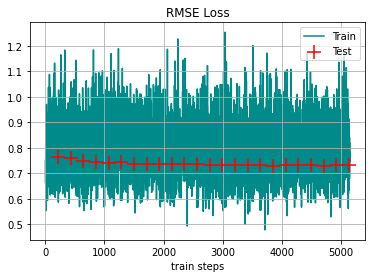

In [337]:
set_random_seed(1999)
train(model, optimizer, criterion, train_loader, test_loader, NUM_EPOCH=24)

In [338]:
set_random_seed(1999)
y_pred = test(model, criterion, test_loader)

unscaled_y_pred = scaler_y.inverse_transform(y_pred.cpu().detach().numpy())
unscaled_y_test = scaler_y.inverse_transform(y_test)

print(f"Best RMSE: {mean_squared_error(unscaled_y_test, unscaled_y_pred) ** 0.5}")

  0%|          | 0/574 [00:00<?, ?it/s]

Best RMSE: 8.778070390508393


### Модель №2 RMSE = 8.790701809542144

Training. Epoch #1:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 1:   0%|          | 0/574 [00:00<?, ?it/s]

Epoch: 	 Train RMSE: 		 Test RMSE:
1. 	 0.885606987555467, 	 0.7682073253372405


Training. Epoch #2:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 2:   0%|          | 0/574 [00:00<?, ?it/s]

2. 	 0.844260713081556, 	 0.7634974868143892


Training. Epoch #3:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 3:   0%|          | 0/574 [00:00<?, ?it/s]

3. 	 0.8343661460810764, 	 0.7558781900264661


Training. Epoch #4:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 4:   0%|          | 0/574 [00:00<?, ?it/s]

4. 	 0.8288163640835483, 	 0.7531283076735739


Training. Epoch #5:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 5:   0%|          | 0/574 [00:00<?, ?it/s]

5. 	 0.825474167920399, 	 0.7495911628630934


Training. Epoch #6:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 6:   0%|          | 0/574 [00:00<?, ?it/s]

6. 	 0.8226487383249314, 	 0.7485689749285734


Training. Epoch #7:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 7:   0%|          | 0/574 [00:00<?, ?it/s]

7. 	 0.8204922016190251, 	 0.741265577617838


Training. Epoch #8:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 8:   0%|          | 0/574 [00:00<?, ?it/s]

8. 	 0.8182737944648031, 	 0.7418431665631536


Training. Epoch #9:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 9:   0%|          | 0/574 [00:00<?, ?it/s]

9. 	 0.8167168870264643, 	 0.7423623253036459


Training. Epoch #10:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 10:   0%|          | 0/574 [00:00<?, ?it/s]

10. 	 0.8149456162025183, 	 0.7424845070892926


Training. Epoch #11:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 11:   0%|          | 0/574 [00:00<?, ?it/s]

11. 	 0.8129868893491026, 	 0.7404214661399662


Training. Epoch #12:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 12:   0%|          | 0/574 [00:00<?, ?it/s]

12. 	 0.8117740968234697, 	 0.7409534995875707


Training. Epoch #13:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 13:   0%|          | 0/574 [00:00<?, ?it/s]

13. 	 0.8106046416633179, 	 0.738922343904133


Training. Epoch #14:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 14:   0%|          | 0/574 [00:00<?, ?it/s]

14. 	 0.809560106873119, 	 0.7354705470260428


Training. Epoch #15:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 15:   0%|          | 0/574 [00:00<?, ?it/s]

15. 	 0.8088644238414058, 	 0.736214912363461


Training. Epoch #16:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 16:   0%|          | 0/574 [00:00<?, ?it/s]

16. 	 0.8074308930034664, 	 0.7374569017193459


Training. Epoch #17:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 17:   0%|          | 0/574 [00:00<?, ?it/s]

17. 	 0.8069043244328657, 	 0.735518444913605


Training. Epoch #18:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 18:   0%|          | 0/574 [00:00<?, ?it/s]

18. 	 0.8057775189986212, 	 0.7326519651280048


Training. Epoch #19:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 19:   0%|          | 0/574 [00:00<?, ?it/s]

19. 	 0.8052178429164587, 	 0.7361823745617052


Training. Epoch #20:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 20:   0%|          | 0/574 [00:00<?, ?it/s]

20. 	 0.8038445757808627, 	 0.7368056972475417


Training. Epoch #21:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 21:   0%|          | 0/574 [00:00<?, ?it/s]

21. 	 0.8037709994857899, 	 0.7341056809296591


Training. Epoch #22:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 22:   0%|          | 0/574 [00:00<?, ?it/s]

22. 	 0.8030743798584052, 	 0.7318098417869429


Training. Epoch #23:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 23:   0%|          | 0/574 [00:00<?, ?it/s]

23. 	 0.8020681020891044, 	 0.7347351012537289


Training. Epoch #24:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 24:   0%|          | 0/574 [00:00<?, ?it/s]

24. 	 0.801155061830994, 	 0.7355706733797486


Training. Epoch #25:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 25:   0%|          | 0/574 [00:00<?, ?it/s]

25. 	 0.8009043373333791, 	 0.732916581661859


Training. Epoch #26:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 26:   0%|          | 0/574 [00:00<?, ?it/s]

26. 	 0.79987470331688, 	 0.7334517844358803


Training. Epoch #27:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 27:   0%|          | 0/574 [00:00<?, ?it/s]

27. 	 0.7994889724423486, 	 0.7343739249357363


Training. Epoch #28:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 28:   0%|          | 0/574 [00:00<?, ?it/s]

28. 	 0.7995252059705739, 	 0.7308442824185933


Training. Epoch #29:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 29:   0%|          | 0/574 [00:00<?, ?it/s]

29. 	 0.7986510283457013, 	 0.7329118692604922


Training. Epoch #30:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 30:   0%|          | 0/574 [00:00<?, ?it/s]

30. 	 0.7971859088967477, 	 0.7293437676251142


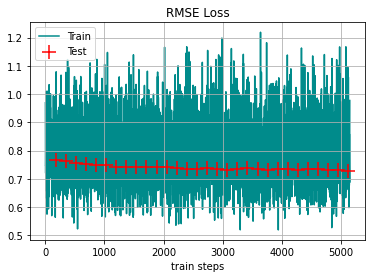

In [356]:
set_random_seed(1999)
train(model, optimizer, criterion, train_loader, test_loader, NUM_EPOCH=30)

In [357]:
set_random_seed(1999)
y_pred = test(model, criterion, test_loader)

unscaled_y_pred = scaler_y.inverse_transform(y_pred.cpu().detach().numpy())
unscaled_y_test = scaler_y.inverse_transform(y_test)

print(f"Best RMSE: {mean_squared_error(unscaled_y_test, unscaled_y_pred) ** 0.5}")

  0%|          | 0/574 [00:00<?, ?it/s]

Best RMSE: 8.790701809542144


### Модель №3. RMSE = 8.75912145225361

Training. Epoch #1:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 1:   0%|          | 0/574 [00:00<?, ?it/s]

Epoch: 	 Train RMSE: 		 Test RMSE:
1. 	 0.8741811707069312, 	 0.7637382993922416


Training. Epoch #2:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 2:   0%|          | 0/574 [00:00<?, ?it/s]

2. 	 0.8380943477419819, 	 0.7603126883195253


Training. Epoch #3:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 3:   0%|          | 0/574 [00:00<?, ?it/s]

3. 	 0.8300779305012417, 	 0.754511813149635


Training. Epoch #4:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 4:   0%|          | 0/574 [00:00<?, ?it/s]

4. 	 0.8254729413579048, 	 0.7502371354697058


Training. Epoch #5:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 5:   0%|          | 0/574 [00:00<?, ?it/s]

5. 	 0.821405876221852, 	 0.7499529621223124


Training. Epoch #6:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 6:   0%|          | 0/574 [00:00<?, ?it/s]

6. 	 0.8189467188746588, 	 0.7440008161790695


Training. Epoch #7:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 7:   0%|          | 0/574 [00:00<?, ?it/s]

7. 	 0.8166914311585185, 	 0.7412356763351254


Training. Epoch #8:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 8:   0%|          | 0/574 [00:00<?, ?it/s]

8. 	 0.8149519236995113, 	 0.7403349825521794


Training. Epoch #9:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 9:   0%|          | 0/574 [00:00<?, ?it/s]

9. 	 0.8127754009477888, 	 0.7385498848630161


Training. Epoch #10:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 10:   0%|          | 0/574 [00:00<?, ?it/s]

10. 	 0.8108815731364687, 	 0.7375232939728461


Training. Epoch #11:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 11:   0%|          | 0/574 [00:00<?, ?it/s]

11. 	 0.8097455403005732, 	 0.7358689099446406


Training. Epoch #12:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 12:   0%|          | 0/574 [00:00<?, ?it/s]

12. 	 0.8089430359597579, 	 0.7400831025132735


Training. Epoch #13:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 13:   0%|          | 0/574 [00:00<?, ?it/s]

13. 	 0.807456493938684, 	 0.7342842503707168


Training. Epoch #14:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 14:   0%|          | 0/574 [00:00<?, ?it/s]

14. 	 0.806264880650626, 	 0.7339068959087445


Training. Epoch #15:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 15:   0%|          | 0/574 [00:00<?, ?it/s]

15. 	 0.8052492545526884, 	 0.7354224167945909


Training. Epoch #16:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 16:   0%|          | 0/574 [00:00<?, ?it/s]

16. 	 0.8045871654876384, 	 0.7349243321900584


Training. Epoch #17:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 17:   0%|          | 0/574 [00:00<?, ?it/s]

17. 	 0.8040091541700402, 	 0.7310166779503174


Training. Epoch #18:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 18:   0%|          | 0/574 [00:00<?, ?it/s]

18. 	 0.8027790229273796, 	 0.7339084838429395


Training. Epoch #19:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 19:   0%|          | 0/574 [00:00<?, ?it/s]

19. 	 0.8024509913038101, 	 0.7338994495337018


Training. Epoch #20:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 20:   0%|          | 0/574 [00:00<?, ?it/s]

20. 	 0.8011685482580732, 	 0.7309325655162957


Training. Epoch #21:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 21:   0%|          | 0/574 [00:00<?, ?it/s]

21. 	 0.8006178379903227, 	 0.7297138195316135


Training. Epoch #22:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 22:   0%|          | 0/574 [00:00<?, ?it/s]

22. 	 0.7996969165418903, 	 0.7293696443482143


Training. Epoch #23:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 23:   0%|          | 0/574 [00:00<?, ?it/s]

23. 	 0.799400773865955, 	 0.7314881837637998


Training. Epoch #24:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 24:   0%|          | 0/574 [00:00<?, ?it/s]

24. 	 0.7987772427714729, 	 0.7311286759085771


Training. Epoch #25:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 25:   0%|          | 0/574 [00:00<?, ?it/s]

25. 	 0.7978250326495853, 	 0.7275725782488697


Training. Epoch #26:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 26:   0%|          | 0/574 [00:00<?, ?it/s]

26. 	 0.7971810841592751, 	 0.7286808100830803


Training. Epoch #27:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 27:   0%|          | 0/574 [00:00<?, ?it/s]

27. 	 0.7971923489744585, 	 0.7284049233908437


Training. Epoch #28:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 28:   0%|          | 0/574 [00:00<?, ?it/s]

28. 	 0.7967721521276052, 	 0.7273177951574326


Training. Epoch #29:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 29:   0%|          | 0/574 [00:00<?, ?it/s]

29. 	 0.7967855636180083, 	 0.7261870120252881


Training. Epoch #30:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 30:   0%|          | 0/574 [00:00<?, ?it/s]

30. 	 0.7956055963002384, 	 0.7291764050514441


Training. Epoch #31:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 31:   0%|          | 0/574 [00:00<?, ?it/s]

31. 	 0.7951753304903655, 	 0.726750064602297


Training. Epoch #32:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 32:   0%|          | 0/574 [00:00<?, ?it/s]

32. 	 0.7940986646556539, 	 0.7276435258704196


Training. Epoch #33:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 33:   0%|          | 0/574 [00:00<?, ?it/s]

33. 	 0.7936502824344612, 	 0.725887793800972


Training. Epoch #34:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 34:   0%|          | 0/574 [00:00<?, ?it/s]

34. 	 0.7938737107230094, 	 0.730515597848942


Training. Epoch #35:   0%|          | 0/5153 [00:00<?, ?it/s]

Validating. Epoch 35:   0%|          | 0/574 [00:00<?, ?it/s]

35. 	 0.7936326847732496, 	 0.7285042848009681


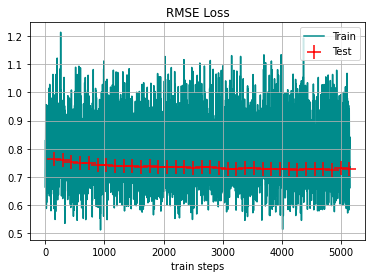

In [19]:
set_random_seed(1999)
train(model, optimizer, criterion, train_loader, test_loader, NUM_EPOCH=35)

In [20]:
set_random_seed(1999)
y_pred = test(model, criterion, test_loader)

unscaled_y_pred = scaler_y.inverse_transform(y_pred.cpu().detach().numpy())
unscaled_y_test = scaler_y.inverse_transform(y_test)

print(f"Best RMSE: {mean_squared_error(unscaled_y_test, unscaled_y_pred) ** 0.5}")

  0%|          | 0/574 [00:00<?, ?it/s]

Best RMSE: 8.75912145225361


хвала небесам.

## Задание 2. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Напишите небольшой отчет о том, как вы добились полученного качества: какие средства использовали и какие эксперименты проводили. Подробно расскажите об архитектурах и значениях гиперпараметров, а также какие метрики на тесте они показывали. Чтобы отчет был зачтен, необходимо привести хотя бы 3 эксперимента.

Первый раз, когда заработал код у меня была следущая модель
```
nn.Linear(90, 200),
ReLU(),
nn.Linear(200, 200),
ReLU(),
nn.Linear(200, 1),
```
RMSE = 12.510693345761279

Пока не будем менять эту базовую архитектуру и расширять количество слоев, сначала подберем оптимальные параметры, которые точно повысят качество, а потом будем экспериментировать с архитектурой. \\
1) Попробуем добавить нормализацию батча, так как нейронные сети очень любят стандартизированные данные. 
Так мы будем подавать на каждый полносвязный слой стандартизиированную выборку, что должно повысить качество модели.

RMSE = 12.387135289994527.
Стало лучше, но пока также плохо. \\

2) Протестировав несколько функций активации ReLu, SELU, LeakyReLU, GELU, приходим к выводу, что SELU даёт наилучший прогноз при прочих равных.
Про эти функции можно почитать здесь https://mlfromscratch.com/activation-functions-explained/. \\
Выяснилось, что SELU и GELU это довольно новые нелинейности, которые сейчас активно используют. 
Причем GELU это последнее слово в NLP (на момент 26.10.2021) и используется в Google's BERT и OpenAI's GPT-2 трасформерах. 
Тогда как SELU характерен внутренней нормализацией, то есть выходы у него с mean = 0 и std = 1. 
Причем эта нормализация отличается от внешней номрализации, которая используется например в методе BatchNorm.

*   12.400410543438088 --> LeakyReLU 
*   12.353388912467361 --> GELU
*   12.009514357416634 --> SELU

3) Кажется, что пора менять архитектуру, так как лосс не уменьшается. Сделаем более плавный переход к последнему слою, а также добавим Dropout, чтобы сеть не переобучалась из-за своей усложненной структуры. Более того, обучение будет проходить быстрее.

```
nn.Linear(90, 250),
nn.BatchNorm1d(250),
nn.SELU(),
nn.Dropout(0.2)

nn.Linear(250, 150),
nn.BatchNorm1d(150),
nn.SELU(),
nn.Dropout(0.2)

nn.Linear(150, 90),
nn.BatchNorm1d(90),
nn.SELU(),
nn.Dropout(0.2)

nn.Linear(90, 1),
```

4) Такая большая ошибка была связана с тем, что в в dataloader мы прописали shuffle=True, убрав этот параметр качество улучшилось на порядок. Finally......
RMSE = 9.401321988600637

5) Переберем несколько значений для Dropout 
*    8.879075271453605 --> Dropout(0.3)
*    8.897358593478394 --> Dropout(0.4)
*    8.857286932490526 --> Dropout(0.2)

6) Увеличим количество эпох до 15 (до этого все время было 5) и чуть уменьшим `lr` с `5e-4` до `1e-4`. Так мы точнее приблизимся к минимумму. 
RMSE = 8.817787131793494

7) Мы еще не меняли размер батча, который все это время был равен 90. Увеличив его размер, сеть обучилась чуть быстрее. В будущем стоит сразу начинать с больших батчей, а потом переходить к маленьким.
Переберём несколько размеров

*   8.833103307175831 --> batch_size = 120
*   8.810133622488744 --> batch_size = 60
*   8.826524221263533 --> batch_size = 80

8) **Модель №1.**
Ошибка опять не падает, увеличим количество эпох до 24 и чуть изменим архитектуру, шаг поставим `1e-4`.
```
nn.Linear(90, 250),
...
nn.Linear(250, 100),
...
nn.Linear(100, 50),
...
nn.Linear(50, 1),
```
RMSE = 8.778070390508393

**Модель №2.** Осталось чуть-чуть... \\
Увеличим количество нейронов и уменьшим шаг до `5e-5`, поставим обучение на 30 эпох.
```
nn.Linear(90, 300),
...
nn.Linear(300, 150),
...
nn.Linear(150, 50),
...
nn.Linear(50, 1),
```
RMSE = 8.790701809542144....................

**Модель №3.** Вернем архитектуру модели №1 и шаг `1e-4` и поставим обучение на 35 эпох. \\
иииииииии RMSE = 8.75912145225361 !!!!!!!!!!!!

9) Во всех моделях мы пользовались optimizer'ом Adam, так как с семинаров известно, что это метод оптимизации второго порядка, который сочетает в себе и инерцию (momentum) и адаптивный шаг для каждого веса. 
Эти навороты позволяют быстрее и точнее находить оптимальные веса, при этом избегая локальных минимумов.
